In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import gseapy as gp

In [2]:
gene_set = gp.read_gmt(path="./gene_sets.gmt")
response_gene_set = gene_set['Response To Lipopolysaccharide (GO:0032496)']

In [44]:
data = pd.read_csv("./expresion_profiles.csv")
subset = data[response_gene_set + ["Unnamed: 0"]]

In [45]:
subset = subset.set_index("Unnamed: 0")

<Axes: ylabel='Unnamed: 0'>

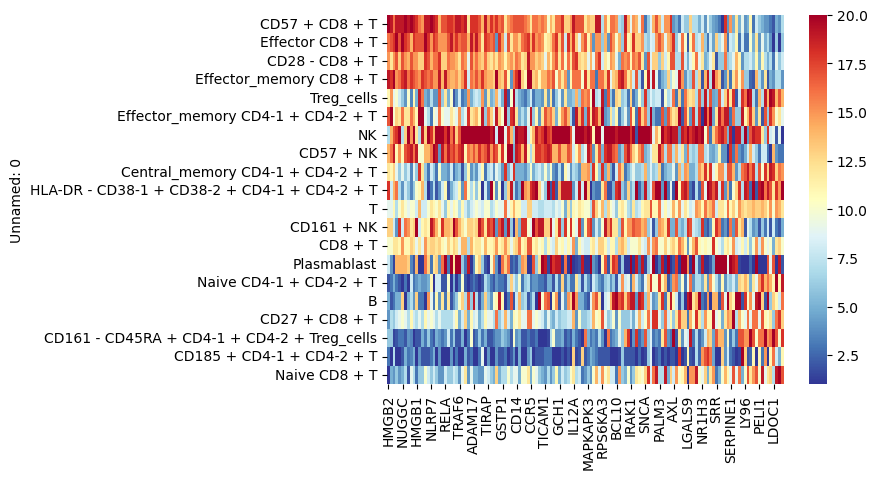

In [ ]:
subset = subset.rank(ascending=True)
#load
correlated_genes_pearson = pd.read_csv("./sorted_pearson_df", index_col = "gene")
#subset
correlated_genes_pearson = correlated_genes_pearson.loc[response_gene_set]
#sort
correlated_genes_pearson = correlated_genes_pearson.sort_values("Correlation", ascending=False)
#resetindex
correlated_genes_pearson.reset_index(inplace=True)
#save order 
order = correlated_genes_pearson["gene"]
subset_whole = subset[order]
sns.heatmap(subset_whole, cmap="RdYlBu_r")
plt.savefig("./heatmap_whole_set.pdf", format="pdf")